In [4]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(test_labels.shape)
train_images = train_images[:5000,:,:].reshape((5000,28,28,1)).astype("float32")/255
train_labels = train_labels[:5000]
test_images = test_images[:1000,:,:].reshape((1000,28,28,1)).astype("float32")/255
test_labels = test_labels[:1000]

(10000,)


In [6]:
train_ds     = tf.data.Dataset.from_tensor_slices((train_images,train_labels)).batch(64)
test_ds      = tf.data.Dataset.from_tensor_slices((test_images,test_labels)).batch(64)


In [7]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28,28,1))
x = layers.Conv2D(filters=2, kernel_size=5, activation="relu")(inputs)
x = layers.Conv2D(filters=4, kernel_size=5, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10,activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs = outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 24, 24, 2)      │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 20, 20, 4)      │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,266 (63.54 KB)

 Trainable params: 16,266 (63.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

callbacks = [ 
    keras.callbacks.ModelCheckpoint(
        filepath="test_model.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]

history = model.fit(train_ds, 
                    epochs=30,
                    validation_data = test_ds,
                    callbacks = callbacks)



Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6054 - loss: 1.3836 - val_accuracy: 0.8520 - val_loss: 0.4846
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8645 - loss: 0.4278 - val_accuracy: 0.8800 - val_loss: 0.3773
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9024 - loss: 0.3321 - val_accuracy: 0.8950 - val_loss: 0.3250
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9195 - loss: 0.2791 - val_accuracy: 0.9050 - val_loss: 0.2901
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9289 - loss: 0.2433 - val_accuracy: 0.9130 - val_loss: 0.2665
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9377 - loss: 0.2161 - val_accuracy: 0.9180 - val_loss: 0.2495
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9434 - loss: 0.1944 - val_accuracy: 0.9240 - val_loss: 0.2360
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9471 - loss: 0.1760 - val_accuracy: 0.9270 - val_loss:

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9504 - loss: 0.1620 
Test accuracy:  0.944


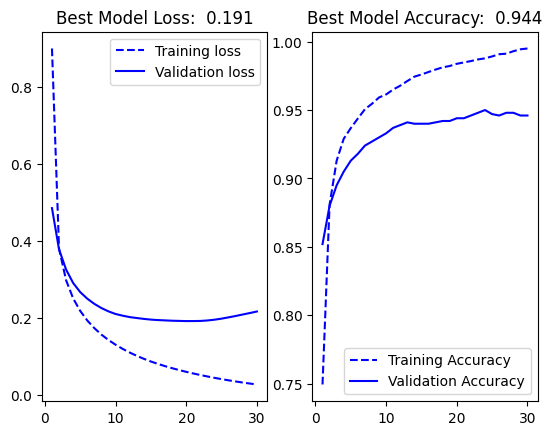

In [9]:
test_model = keras.models.load_model("test_model.keras")
test_loss, test_acc = test_model.evaluate(test_ds)
print(f"Test accuracy: {test_acc: .3f}")

import matplotlib.pyplot as plt
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
val_acc   = history.history["val_accuracy"]
epochs = range(1, len(train_loss) + 1)

figure, axis = plt.subplots(1,2)
axis[0].plot(epochs, train_loss, "b--", label = "Training loss")
axis[0].plot(epochs, val_loss, "b", label = "Validation loss")
axis[0].set_title(f"Best Model Loss: {test_loss: .3f}")
axis[0].legend()
axis[1].plot(epochs, train_acc, "b--", label = "Training Accuracy")
axis[1].plot(epochs, val_acc, "b", label = "Validation Accuracy")
axis[1].set_title(f"Best Model Accuracy: {test_acc: .3f}")
axis[1].legend()
